In [140]:
import pandas as pd
import numpy as np
import ptitprince as pt
import seaborn as sns
import scipy.stats as st
import os
import pickle

In [99]:
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams.update({'font.size':15})

In [56]:
sns.set_palette('colorblind')

# Gaussian estimator
The below were computed after dropping all NaNs with dt=1.

In [2]:
mutable = pd.read_csv('../MegaBike/MICalcs/mutable/mutable_Gaussian_emergence_criteria.csv').drop('Unnamed: 0', axis = 1)
mutable['rule type'] = 'mutable'

In [3]:
immutable = pd.read_csv('../MegaBike/MICalcs/immutable/immutable_Gaussian_emergence_criteria.csv').drop('Unnamed: 0', axis = 1)
immutable['rule type'] = 'immutable'

In [4]:
mutable.head()

,Psi,Gamma,Delta,rule type
0,0.000386,0.000101,-0.001291,mutable
1,0.000109,0.000048,-0.000128,mutable
2,0.011473,0.000020,-0.000154,mutable
3,0.000238,0.000096,0.000081,mutable
4,0.001505,0.000027,0.000010,mutable


In [5]:
immutable.head()

,Psi,Gamma,Delta,rule type
0,0.000929,0.000112,-0.000163,immutable
1,0.004876,0.000067,-0.000334,immutable
2,0.004261,0.000454,-0.002218,immutable
3,0.006253,0.000086,-0.000296,immutable
4,0.013665,0.000043,-0.005143,immutable


In [7]:
df_all = pd.merge(mutable, immutable, how="outer")

<Axes: xlabel='rule type', ylabel='Psi'>

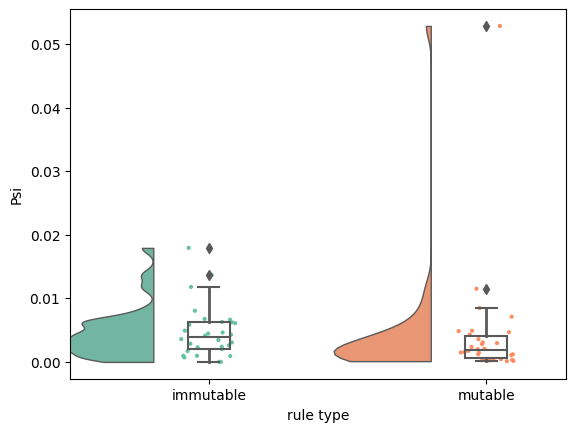

In [8]:
pt.RainCloud(data = df_all, x = 'rule type', y = 'Psi')

<Axes: xlabel='rule type', ylabel='Gamma'>

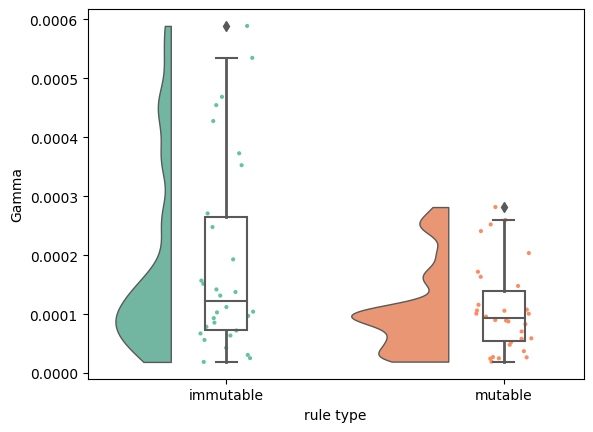

In [9]:
pt.RainCloud(data = df_all, x = 'rule type', y = 'Gamma')

<Axes: xlabel='rule type', ylabel='Delta'>

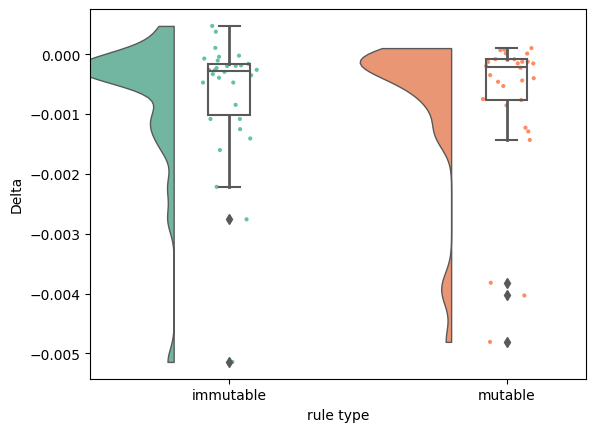

In [10]:
pt.RainCloud(data = df_all, x = 'rule type', y = 'Delta')

## Notes

Introducing an outlier affects the correct estimation of mutual information. While still preserving information abut bikes with players who perished, replacing `NaN`s with an outlier will affect the Gaussian assumption. Therefore, we remove the `NaN` values.

When looking at the X, Y coordinates of the agents and the bikes, while individually unimodal, it does not appear that they are jointly Gaussian as they form a ring structure in 2D space.

These results are probably the least robust.

# Kernel estimator
With replacing all `NaN`s with -100. Kernel estimator is more robust to outliers, but results are still hard to interpret.

In [13]:
mutable = pd.read_csv('../MegaBike/MICalcs/mutable/mutable_kernel_nanrepl_emergence_criteria.csv').drop('Unnamed: 0', axis = 1)
mutable['rule type'] = 'mutable'

In [14]:
immutable = pd.read_csv('../MegaBike/MICalcs/immutable/immutable_kernel_nanrepl_emergence_criteria.csv').drop('Unnamed: 0', axis = 1)
immutable['rule type'] = 'immutable'

In [15]:
df_all = pd.merge(mutable, immutable, how="outer")

<Axes: xlabel='rule type', ylabel='Psi'>

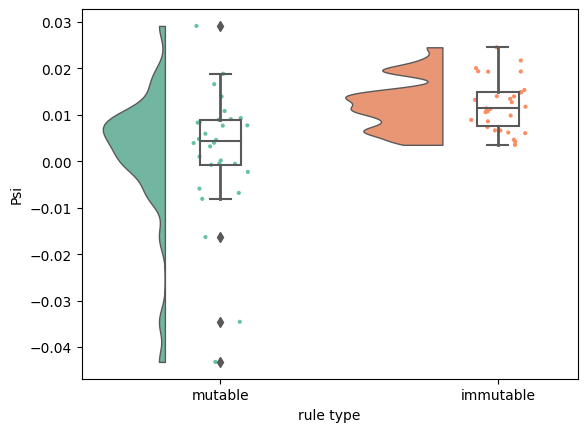

In [16]:
pt.RainCloud(data = df_all, x = 'rule type', y = 'Psi')

<Axes: xlabel='rule type', ylabel='Gamma'>

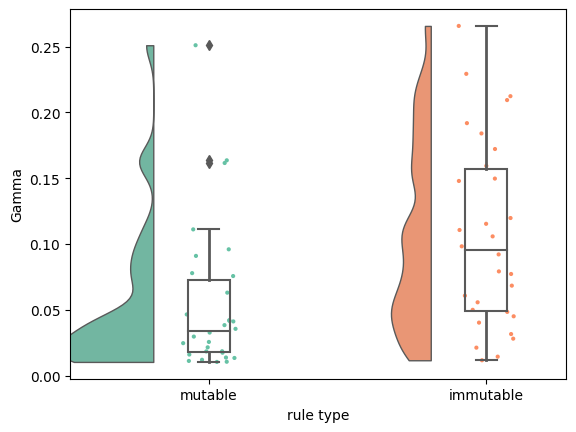

In [17]:
pt.RainCloud(data = df_all, x = 'rule type', y = 'Gamma')

<Axes: xlabel='rule type', ylabel='Delta'>

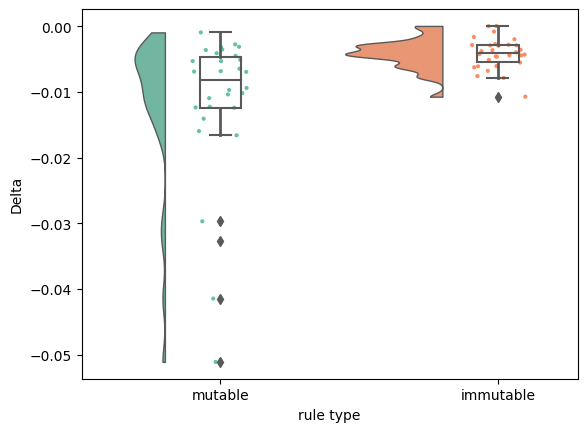

In [18]:
pt.RainCloud(data = df_all, x = 'rule type', y = 'Delta')

# Kraskov estimator
With removing all `NaN` values. Kraskov is robust to non-Gaussian data, as ours is, and has been used before in flocking studies e.g.

Wang, X. R., et al., "Measuring Information Storage and Transfer in Swarms", ECAL 2011, ed. T. Lenaerts, et al., pp. 838–845. MIT Press, 2011


In [212]:
mutable = pd.read_csv('../MegaBike/MICalcs/mutable/mutable_Kraskov1_emergence_criteria.csv').drop('Unnamed: 0', axis = 1)
mutable['search space limits'] = 'flexible'

In [213]:
immutable = pd.read_csv('../MegaBike/MICalcs/immutable/immutable_Kraskov1_emergence_criteria.csv').drop('Unnamed: 0', axis = 1)
immutable['search space limits'] = 'inflexible'

## Stats

In [121]:
mutable[['Psi', 'Gamma', 'Delta']].mean(),immutable[['Psi', 'Gamma', 'Delta']].mean()

(Psi      1.992736
 Gamma    0.032944
 Delta    0.025094
 dtype: float64,
 Psi      1.296123
 Gamma    0.031470
 Delta    0.020644
 dtype: float64)

In [118]:
mutable[['Psi', 'Gamma', 'Delta']].std(),immutable[['Psi', 'Gamma', 'Delta']].std()

(Psi      0.936829
 Gamma    0.011770
 Delta    0.010165
 dtype: float64,
 Psi      0.293386
 Gamma    0.013466
 Delta    0.011584
 dtype: float64)

In [115]:
st.normaltest(mutable['Psi']), st.normaltest(immutable['Psi'])

(NormaltestResult(statistic=2.5922578320758793, pvalue=0.2735888311087457),
 NormaltestResult(statistic=1.3375914673908138, pvalue=0.512325182388095))

In [116]:
st.shapiro(mutable['Psi']), st.shapiro(immutable['Psi'])

(ShapiroResult(statistic=0.9629778861999512, pvalue=0.3682388365268707),
 ShapiroResult(statistic=0.9710329174995422, pvalue=0.5678109526634216))

In [122]:
st.ttest_ind(immutable['Psi'], mutable['Psi'], equal_var = False, alternative = 'less')

Ttest_indResult(statistic=-3.8866540067799837, pvalue=0.00021902861817462666)

## Plots

In [45]:
df_all = pd.merge(mutable, immutable, how="outer")

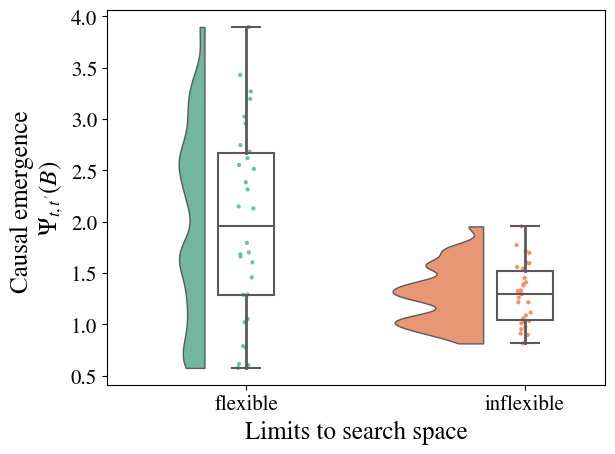

In [104]:
pt.RainCloud(data = df_all, x = 'search space limits', y = 'Psi',
            width_viol = 0.65, jitter=0.03, offset = 0.15, width_box = 0.2)
plt.ylabel("Causal emergence \n$\\Psi_{t,t'}(B)$", fontsize = 18);
plt.xlabel("Limits to search space", fontsize = 18)
plt.tight_layout()
plt.savefig('MICalcs/psi.pdf')

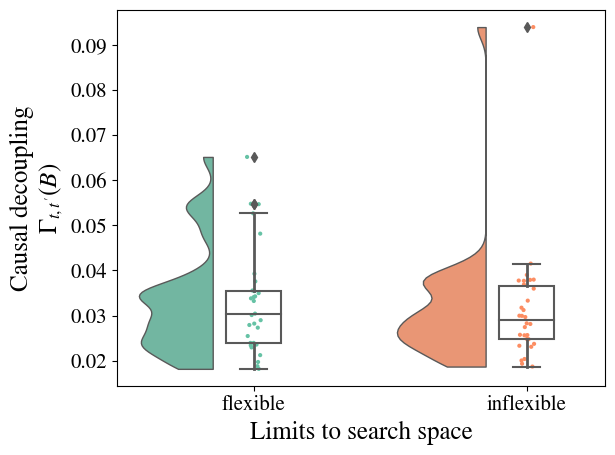

In [105]:
pt.RainCloud(data = df_all, x = 'search space limits', y = 'Gamma',
             width_viol = 0.65, jitter=0.03, offset = 0.15, width_box = 0.2)
plt.ylabel("Causal decoupling\n$\\Gamma_{t,t'}(B)$", fontsize = 18);
plt.xlabel("Limits to search space", fontsize = 18)
plt.tight_layout()
plt.savefig('MICalcs/gamma.pdf')

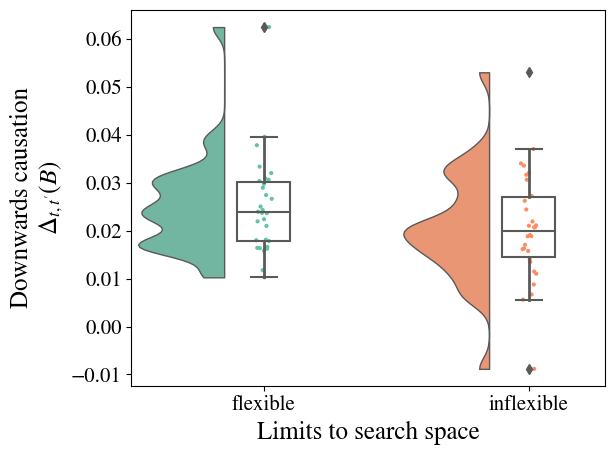

In [106]:
pt.RainCloud(data = df_all, x = 'search space limits', y = 'Delta',
            width_viol = 0.65, jitter=0.03, offset = 0.15, width_box = 0.2)
plt.ylabel("Downwards causation\n$\\Delta_{t,t'}(B)$", fontsize = 18);
plt.xlabel("Limits to search space", fontsize = 18)
plt.tight_layout()
plt.savefig('MICalcs/delta.pdf')

In [29]:
df_melt = df_all.melt(value_vars = ['Psi', 'Gamma', 'Delta'], id_vars = ['rule type'])

<Axes: xlabel='variable', ylabel='value'>

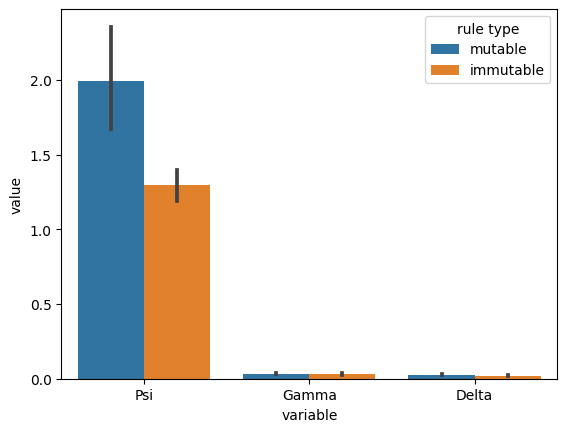

In [30]:
sns.barplot(data = df_melt, x='variable', y='value', hue = 'rule type')

## Notes

- the higher $\Psi$ is, the more synergetic causal emergence in the system i.e. the leader makes some novel decisions based on the player's contributions, which are consistent in time, such that predicting the leader's behaviour makes predicting the system easier than predicting the invdividual
- we see some consistently high $\Psi$ in the Mutable case, suggesting more emergence of collective behaviour
- $\Gamma = 0$ with $\Psi > 0$ means causal decoupling  i.e. the system behaviour is preserved even when agents don't interact - none here, as all agents need to pedal for the bike to move/the bike cannot move without agents doing something.
- $\Delta > 0$ means downwards causation - when the behaviour of the whole bike affects the individuals - there seems to be more in the mutable case.



# Leadership analysis

In [131]:
from micalcs import handle_nans

In [218]:
def traj_leader(path, d, f):

    print(f"Loading run {f}")
    with open(f"{path}{d}/{f}/bike_data.pickle", 'rb') as dat:
        bike = pickle.load(dat)
    with open(f"{path}{d}/{f}/agent_data.pickle", 'rb') as dat:
        agents = pickle.load(dat)
    X = agents.transpose(1, 0, 2)
    V = bike
    X, V = handle_nans(X, V)
    M = np.sum(X, axis = 1)
    
    diffs = M - V
    return np.mean(diffs), np.std(diffs)



In [219]:
path = "../MegaBike/vectorisedDumps/"
runs = lambda d: os.listdir(f"{path}/{d}")

In [228]:
def agg_leader_data(d):
    hashes = []
    means = []
    stds = []
    for f in runs(d):
        results = traj_leader(path, d, f)
        hashes.append(f)
        means.append(results[0])
        stds.append(results[1])

    df_leader = pd.DataFrame({ 'Hash': hashes, 'Diff mean': means, 'Diff std': stds })
    return df_leader
    

In [229]:
%%capture
mutable_lead   = agg_leader_data('mutable')
immutable_lead = agg_leader_data('immutable')

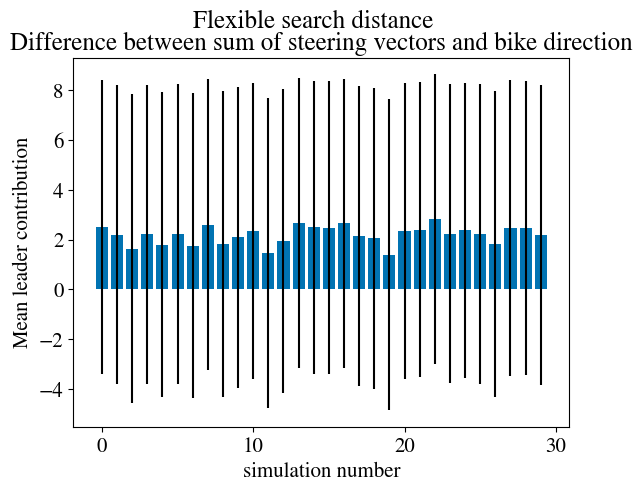

In [230]:
plt.bar(list(range(30)), mutable_lead['Diff mean'], yerr = mutable_lead['Diff std'])
plt.xlabel('simulation number')
plt.xticks([0, 10, 20, 30])
plt.ylabel('Mean leader contribution')
plt.suptitle('Flexible search distance')
plt.title('Difference between sum of steering vectors and bike direction');

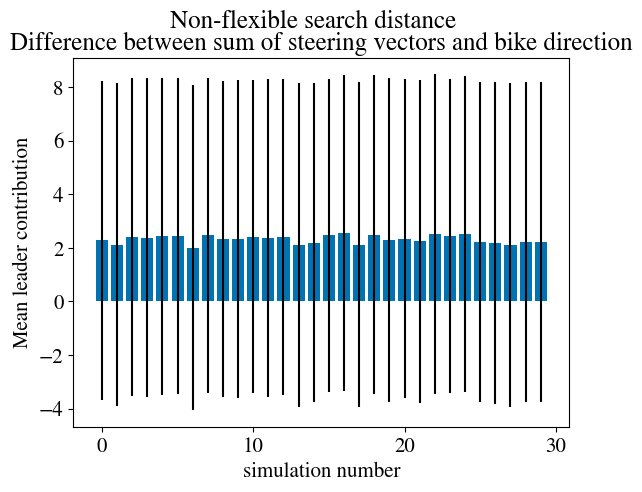

In [231]:
plt.bar(list(range(30)), immutable_lead['Diff mean'], yerr = immutable_lead['Diff std'])
plt.xlabel('simulation number')
plt.xticks([0, 10, 20, 30])
plt.ylabel('Mean leader contribution')
plt.suptitle('Non-flexible search distance')
plt.title('Difference between sum of steering vectors and bike direction');

In [241]:
mutable = mutable.merge(mutable_lead)
immutable = immutable.merge(immutable_lead)

In [251]:
all = pd.merge(mutable, immutable, how="outer").rename({ 'search space limits': 'type', 'Diff mean': 'Diff_mean', 'Diff std': 'Diff_std' }, axis = 1)

In [252]:
all.head()

,Hash,Psi,Gamma,Delta,type,Diff_mean,Diff_std
0,00df88ea-8f23-4d7c-9e44-b8d9a85b2de6,1.391845,0.035984,0.033553,inflexible,2.399959,5.942674
1,06dae11a-8d00-4a8c-8fd3-9c26e5fff9e7,1.682718,0.022967,0.010258,flexible,2.219454,6.008727
2,06f92494-b2d7-41ab-9951-e5c5163a644c,2.130583,0.028244,0.023936,flexible,2.241007,5.990241
3,0c56c3c1-0800-406c-b301-d8a1612151ec,3.430917,0.037589,0.030598,flexible,2.826081,5.806177
4,1112e212-41fa-49fd-b1c0-365c40d5ae37,0.603333,0.018227,0.011750,flexible,1.470243,6.221534


## Statistical tests

In [248]:
import statsmodels.formula.api as smf

In [257]:
results = smf.ols('Psi ~ type + Diff_mean + Diff_std', data = all).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Psi   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     96.29
Date:                Tue, 07 May 2024   Prob (F-statistic):           4.36e-22
Time:                        11:21:12   Log-Likelihood:                -14.626
No. Observations:                  60   AIC:                             37.25
Df Residuals:                      56   BIC:                             45.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.5308      8.969      1.063      0.293      -8.436      27.498
type[T.inflexible]    -0.9847      0.085    -11.570      0.000      -1.155      -0.814
Diff_mean              1.6289      0.475      3.432      0.001       0.678       2.580
Diff_std              -1.8524      1.330     -1.393      0.169      -4.516       0.811
==============================================================================
Omnibus:                        2.013   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.330
Skew:                          -0.031   Prob(JB):                        0.514
Kurtosis:                       3.727   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [258]:
results = smf.ols('Psi ~ type + Diff_mean', data = all).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Psi   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     141.1
Date:                Tue, 07 May 2024   Prob (F-statistic):           8.36e-23
Time:                        11:21:19   Log-Likelihood:                -15.648
No. Observations:                  60   AIC:                             37.30
Df Residuals:                      57   BIC:                             43.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.9547      0.345     -8.571      0.000      -3.645      -2.264
type[T.inflexible]    -0.9722      0.085    -11.394      0.000      -1.143      -0.801
Diff_mean              2.2545      0.155     14.566      0.000       1.945       2.564
==============================================================================
Omnibus:                        1.978   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.292
Skew:                           0.024   Prob(JB):                        0.524
Kurtosis:                       3.717   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
results = smf.ols('Psi ~ Diff_mean', data = all).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Psi   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     47.33
Date:                Tue, 07 May 2024   Prob (F-statistic):           4.67e-09
Time:                        11:21:46   Log-Likelihood:                -51.261
No. Observations:                  60   AIC:                             106.5
Df Residuals:                      58   BIC:                             110.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5589      0.616     -4.157      0.000      -3.791      -1.327
Diff_mean      1.8635      0.271      6.880      0.000       1.321       2.406
==============================================================================
Omnibus:                        5.051   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.999
Skew:                           0.672   Prob(JB):                       0.0821
Kurtosis:                       2.561   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

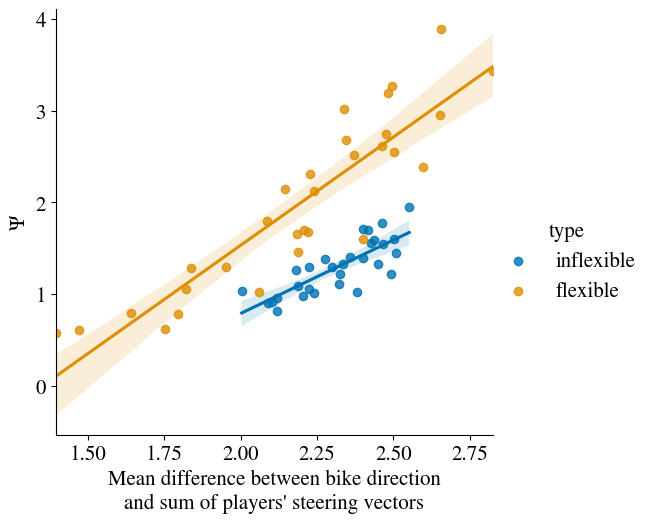

In [271]:
sns.lmplot(data = all, x = 'Diff_mean', y = 'Psi', hue = 'type')
plt.xlabel("Mean difference between bike direction\nand sum of players' steering vectors")
plt.ylabel('$\Psi$')
plt.savefig('MICalcs/Leader_diff_psi.pdf')

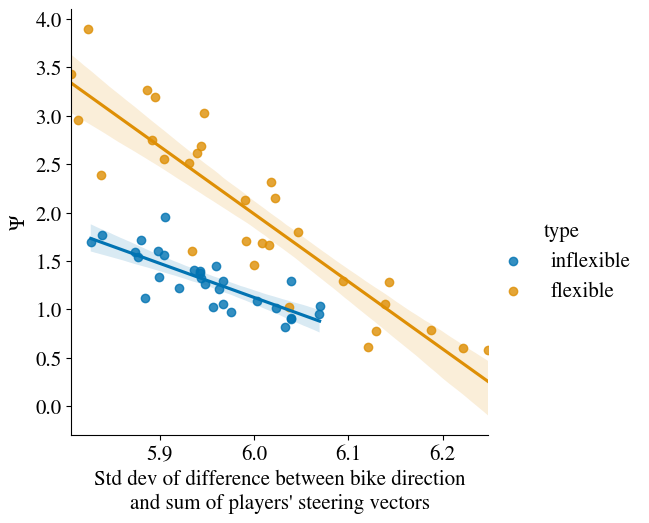

In [269]:
sns.lmplot(data = all, x = 'Diff_std', y = 'Psi', hue = 'type')
plt.xlabel("Std dev of difference between bike direction\nand sum of players' steering vectors")
plt.ylabel('$\Psi$')
plt.savefig('MICalcs/Leader_std_diff_psi.pdf')